# Cross Validation with Decision Trees, Random Forests, and Gradient Boosting Classifiers


## Wine data set
A detailed implementation of Decision Tree Classification, Random Forest and Gradient Boosting models using the wine data set from the UCI Machine learning website.

http://archive.ics.uci.edu/ml/datasets/Wine


#### Data Set Information:

The variables used in the models are listed below:
    - type
    - Alcohol
    - Malic_acid
    - Ash
    - Alcalinity
    - Magnesium
    - Total_phenols
    - Flavanoids
    - Nonflavanoid_phenols
    - Proanthocyanins
    - Color_intensity
    - Hue
    - OD280/OD315
    - Proline
    


# Goals of this ipynb
    
    In this notebook we will:
     -Removed outliers using the Tukey Method
    - Create Decision trees, Random Forests, and Gradient Boosting Models 
    - Adjust hyperparamter of depth to find best model of each type
    - Implement k-fold cross-evaluation 
    - Evaluate the models 
    - Determined the best model (random forest)
    - Evaluate feature importances in the best model

## Section 1: Data Exploration


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames


import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading and Quick Explore of Data
This dataset was explored and cleaned in detail in the ipynb 'Preprocessing'

In [2]:
cols =['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', \
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'] 

In [3]:
# Load the Red Wines dataset
df = pd.read_csv("wine.data.txt", sep=',', \
                   names=['type','Alcohol', 'Malic_acid', 'Ash', 'Alcalinity',\
                            'Magnesium', 'Total_phenols', 'Flavanoids', \
                            'Nonflavanoid_phenols', 'Proanthocyanins', \
                            'Color_intensity', 'Hue', 'OD280/OD315', \
                            'Proline' ])
# Display the first five records

df.head()


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
type                    178 non-null int64
Alcohol                 178 non-null float64
Malic_acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity              178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280/OD315             178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


### Check for Nans

In [5]:
# count total nans
df.isnull().values.sum()      

0

### Descriptic Statistics:

In [6]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [7]:
# The data types are slightly imbalanced
df.type.value_counts()

2    71
1    59
3    48
Name: type, dtype: int64

# Identify and Remove Outliers

## Tukey Method for Outlier Detection

In [8]:
# For each feature find the data points with extreme high or low values
for feature in df.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])
    


Data points considered outliers for the feature 'type':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


Data points considered outliers for the feature 'Alcohol':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


Data points considered outliers for the feature 'Malic_acid':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


Data points considered outliers for the feature 'Ash':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


Data points considered outliers for the feature 'Alcalinity':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466


Data points considered outliers for the feature 'Magnesium':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


Data points considered outliers for the feature 'Total_phenols':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


Data points considered outliers for the feature 'Flavanoids':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


Data points considered outliers for the feature 'Nonflavanoid_phenols':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


Data points considered outliers for the feature 'Proanthocyanins':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937
110,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562


Data points considered outliers for the feature 'Color_intensity':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
151,3,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
158,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
159,3,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
166,3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


Data points considered outliers for the feature 'Hue':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
115,2,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


Data points considered outliers for the feature 'OD280/OD315':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


Data points considered outliers for the feature 'Proline':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


In [9]:
# Outliers to remove


# Select the indices for data points to remove
outliers  = [25, 59, 69, 73, 78, 95, 110, 115, 121, 123, 127, 137, 151, 158, 159, 166, 173]

# Remove the outliers
good_data = df.drop(df.index[outliers]).reset_index(drop = True)
             
good_data.shape



(161, 14)

In [10]:
# Reassign dataframe with outliers removed
df = good_data
df.shape

(161, 14)

In [11]:
# value count of data types with outliers removed
df.type.value_counts()

2    61
1    58
3    42
Name: type, dtype: int64

# Part 2: Using Machine Learning to Classify Wine by 'type'

In [12]:
# Importing
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

In [13]:
# 3 types of wine
df['type'].unique()


array([1, 2, 3])

In [14]:

df['type'].value_counts()

2    61
1    58
3    42
Name: type, dtype: int64

# Crossfold Validation on Decision Tree, Random Forest, and Gradient Boosting Classifier.

In [15]:
# Set up X and y
from sklearn.model_selection import train_test_split

X = df[['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315', 'Proline']]
y = df['type']

## Decision Tree
Using cross validation and adjusting the max_depth to find the best Decision Tree


In [16]:
# Determine average accuracy for Decision Tree, using KFold and different depths 
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    DTC = DecisionTreeClassifier(max_depth=k, random_state=3)
    scores = cross_val_score(DTC, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
print("Min: ", np.array(k_scores).min().max())
print("Max: ", np.array(k_scores).max())
print("Mean: ", np.array(k_scores).mean())

[0.6787745098039216, 0.8486437908496732, 0.8535457516339869, 0.8832271241830065, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066, 0.8769771241830066]
Min:  0.6787745098039216
Max:  0.8832271241830065
Mean:  0.8688532135076253


Text(0, 0.5, 'Cross-Validated Accuracy')

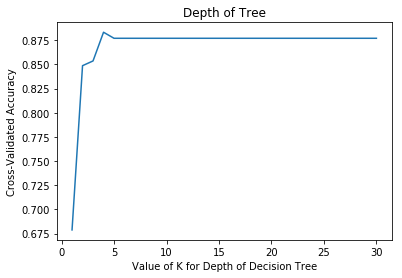

In [17]:
# determine for an optimal depth(K) for DTC (30 iterations)

import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for Classifier (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.title('Depth of Tree')
plt.xlabel('Value of K for Depth of Decision Tree')
plt.ylabel('Cross-Validated Accuracy')



##  Decision Tree results
- Min:  0.6787745098039216
- Max:  0.8832271241830065
- Mean:  0.8688532135076253


The best decision tree as a depth of 4, with an accuracy of 0.8832271241830065



## Draw the Best Decision Tree


In [18]:
# Recreate best decision tree
from sklearn.tree import DecisionTreeClassifier
BestDTree=DecisionTreeClassifier(max_depth=4, random_state=3)
BestDTree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

In [19]:
df.keys()

Index(['type', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'],
      dtype='object')

In [20]:
feat_names = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315', 'Proline']

In [21]:
# Visualize Best Tree
import collections
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus


# Visualize data
dot_data = tree.export_graphviz(BestDTree,
                                feature_names=feat_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [22]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [23]:
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

# Create PDF
#graph.write_pdf("iris.pdf")

True

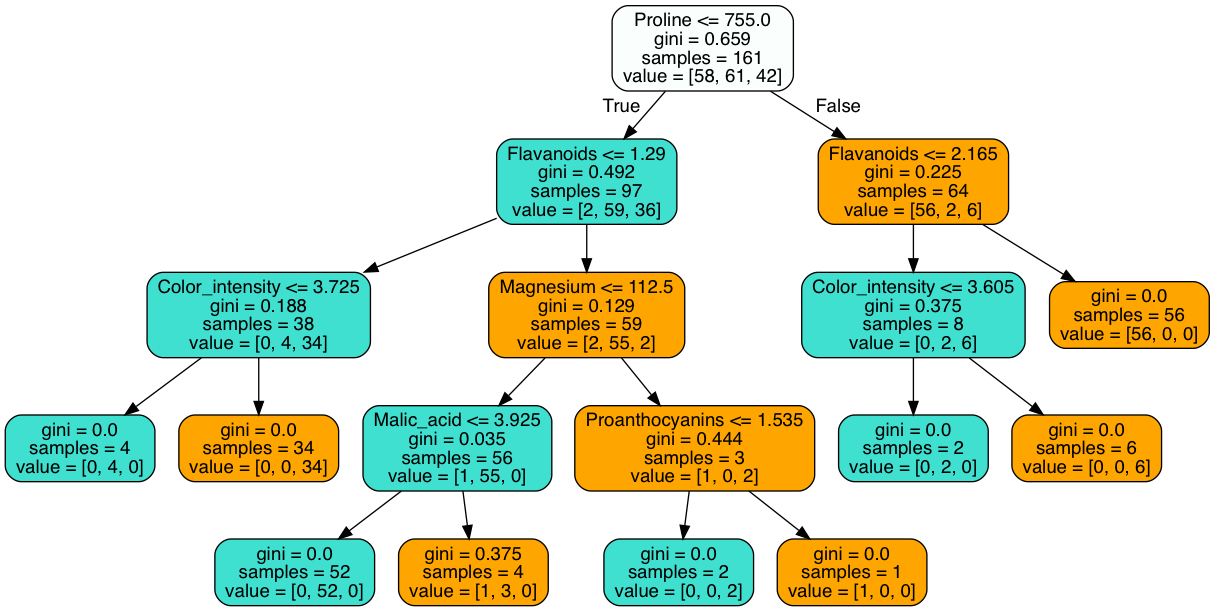

In [24]:
from IPython.display import Image
Image(filename='tree.png') 

## Random Forest
Using cross validation and adjusting the max_depth to find the best Random Forest

In [25]:
# Use cross validation to determine accuracy for Random Forest and different depths

k_range = list(range(1, 31))
k_scores = []

for k in k_range:
    RFC = RandomForestClassifier(n_estimators=100, max_depth=k, random_state=3)
    scores = cross_val_score(RFC, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
print("Min: ", np.array(k_scores).min().max())
print("Max: ", np.array(k_scores).max())
print("Mean: ", np.array(k_scores).mean())

[0.9818954248366014, 0.982312091503268, 0.982638888888889, 0.9875, 0.99375, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875]
Min:  0.9818954248366014
Max:  0.99375
Mean:  0.9871865468409589


Text(0, 0.5, 'Cross-Validated Accuracy')

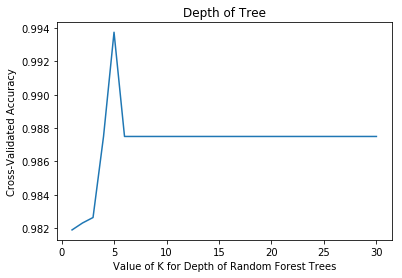

In [26]:
# Determine for optimal depth (K) in RFC 
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for Classifier (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.title('Depth of Tree')
plt.xlabel('Value of K for Depth of Random Forest Trees')
plt.ylabel('Cross-Validated Accuracy')

Summary of Random Forest:
- Min:  0.9818954248366014
- Max:  0.99375
- Mean:  0.9871865468409589

The best Random Forest has a depth of 5 and accuracy of  0.99375. It is also less complex than other trees.

## Gradient Boosting Classifier

In [27]:
# Determine average accuracy for Gradient Boost, using KFold and different depths 
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth =k,random_state=3)
    scores = cross_val_score(GBC, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
print("Min: ", np.array(k_scores).min().max())
print("Max: ", np.array(k_scores).max())
print("Mean: ", np.array(k_scores).mean())

[0.9878676470588236, 0.9875, 0.9642565359477124, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915, 0.958047385620915]
Min:  0.958047385620915
Max:  0.9878676470588236
Mean:  0.960230119825708


Text(0, 0.5, 'Cross-Validated Accuracy')

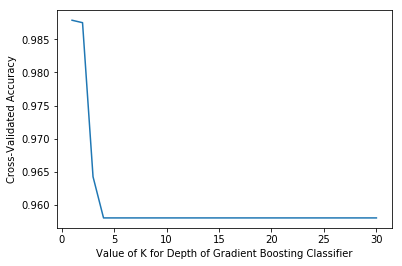

In [28]:
# Determine for optimal depth (K) in GBC 


import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for Classifier (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for Depth of Gradient Boosting Classifier')
plt.ylabel('Cross-Validated Accuracy')

 The best Gradient Boosting Classifier model has depth of 1.
- Min:  0.958047385620915
- Max:  0.9878676470588236
- Mean:  0.960230119825708

# Section 3: Choosing the Best Model: Random Forest 


The average scores for Random Forest outperformed the decision tree and the gradient boosting classifier

Summary of Random Forest:
- Min:  0.9818954248366014
- Max:  0.99375
- Mean:  0.9871865468409589

#### The best Random Forest has a depth of 5 and accuracy of  0.99375. It is less complex than other trees that scored lower.

The best Gradient Boosting Classifier had an accuracy:  0.9878676470588236.
And the best Decision Tree Classifier had anaccuracy of 0.8832271241830065


In [29]:
# Import train_test_split
from sklearn.model_selection import train_test_split

X = df[['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315', 'Proline']]
y = df['type']

Next, we'll create training and testing subsets that we'll use to train our classifiers. 

In [30]:
data_train, data_test, target_train, target_test \
= train_test_split(X,y,test_size = 0.2,random_state=3)

In [31]:
# Optimal Model 

from sklearn.ensemble import RandomForestClassifier

#Create Classifier
clf=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(data_train,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [32]:
# Accuracy
y_pred=clf.predict(data_test)

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(target_test, y_pred))

Accuracy: 0.9696969696969697


In [33]:
from sklearn.metrics import classification_report

In [34]:
# Classification Report and Confusion Matrix
RFC_prediction = clf.predict(data_test)
print ('\n Classification report:\n', classification_report(target_test, RFC_prediction))
print ('\n Confussion matrix:\n',confusion_matrix(target_test, RFC_prediction))


 Classification report:
               precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        12

   micro avg       0.97      0.97      0.97        33
   macro avg       0.96      0.98      0.97        33
weighted avg       0.97      0.97      0.97        33


 Confussion matrix:
 [[13  1  0]
 [ 0  7  0]
 [ 0  0 12]]


The Random Forest accurately predicted all but one from the test set.

## Evaluate feature importances

In [35]:
# Determine feature importance
feature_imp = pd.Series(clf.feature_importances_,index=feat_names).\
sort_values(ascending=False)
feature_imp

Proline                 0.245658
Flavanoids              0.162105
Color_intensity         0.135319
Alcohol                 0.127683
OD280/OD315             0.087268
Hue                     0.082508
Total_phenols           0.045450
Proanthocyanins         0.032794
Malic_acid              0.028953
Alcalinity              0.017191
Magnesium               0.015316
Nonflavanoid_phenols    0.011893
Ash                     0.007864
dtype: float64

No handles with labels found to put in legend.


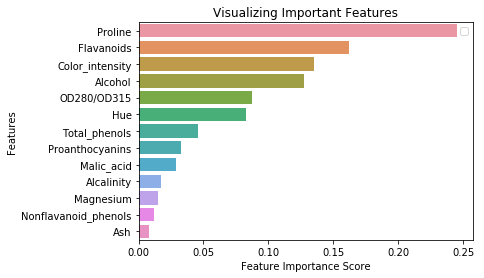

In [36]:
# Bar plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [37]:
# A look at the final model

from pprint import pprint
# Look at parameters used by our current forest
print('Selected Model, Random Forest:\n')
pprint(clf.get_params())

Selected Model, Random Forest:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}


# Section 4: Conclusion
Our decision trees, random forests and gradient boosting models were created using cross-folds validation. The hyperparameter of depth was adjusted 30 times for each model providing results for depths 1 - 30. 

The best model was the Random Forest with 100 n_estimators, a max_depth of 5 and an accuracy of  0.99375. 

Prolin, Flavanoids, and Color_intensity are the most important features in the model to determine type.

- Proline                 0.216652
- Flavanoids              0.162662
- Color_intensity         0.140359
